# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Parametros-iniciales" data-toc-modified-id="Parametros-iniciales-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parametros iniciales</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-motor" data-toc-modified-id="Rotación-de-P4---referencia-motor-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Rotación de P4 - referencia motor</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-polarizador" data-toc-modified-id="Rotación-de-P4---referencia-polarizador-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rotación de P4 - referencia polarizador</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Final</a></div>

# Analyze calibration

**Author**: Jesús del Hoyo

**Date of creation**:   01/07/2019

**Motivation**: Ecograb project, polariscope callibration

**Objective**: This file is used to analyze an experimental calibration file or files created using version 1.2. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget

In [2]:
import polaripython.calibration as cal
import numpy as np

## Test modell_all_together

In [7]:
from polaripython.calibration import degrees
import numpy as np
import time

In [4]:
par = [0, -44*degrees, 1, 
       0.975, 0.05, 45*degrees, 0, 0,
      1, 1, 82.9*degrees, 0,
      1, 1, 82.9*degrees, 0, 0,
      0.975, 0.05, 0,
      0.975, 0.05, 0,
      0.95, 0.4]
S0 = 5.9227
mode1 = 'P2'
mode2 = 'R2+P2'
th1 = np.linspace(0, 180*degrees, 91)
thX = np.linspace(0, 180*degrees, 15)
thY = np.linspace(0, 180*degrees, 15)
thX4b = np.linspace(0, 180*degrees, 31)
thY4b = np.linspace(0, 180*degrees, 31)
start_time = time.time()
I = cal.model_all_together(par, th1, thX, thY, thX4b, thY4b, S0, mode1, mode2)
end_time = time.time()
print('Elapsed time is {} s.'.format(end_time - start_time))

Elapsed time is 1.9149019718170166 s.


In [5]:
start_time = time.time()
for ind in range(24):
    I = cal.model_all_together(par, th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Npar=ind)
end_time = time.time()
print('Elapsed time is {} s.'.format(end_time - start_time))

Elapsed time is 27.567299365997314 s.


## Test error_all_together

In [6]:
import os
# Load data
folder = r'D:\Codigo_UCM\polaripython\calibration\Calibration_2019-07-15'
file = '2019-07-15'
filename = 'Step_1_' + file + '.npz'
Iexp = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
os.chdir(folder)

data = np.load(filename, encoding='latin1')
Iexp[0] = data["Iexp"]
th1 = data["angles_1"]

filename = 'Step_2a_' + file + '.npz'
data = np.load(filename, encoding='latin1')
Iexp[1] = data["Iexp"]

filename = 'Step_2b_' + file + '.npz'
data = np.load(filename, encoding='latin1')
Iexp[2] = data["Iexp"]
thX = data["angles2x"]
thY = data["angles2y"]

filename = 'Step_3a_' + file + '.npz'
data = np.load(filename, encoding='latin1')
Iexp[3] = data["Iexp"]

filename = 'Step_3b_' + file + '.npz'
data = np.load(filename, encoding='latin1')
Iexp[4] = data["Iexp"]

filename = 'Step_3c_' + file + '.npz'
data = np.load(filename, encoding='latin1')
Iexp[5] = data["Iexp"]

filename = 'Step_4a_' + file + '.npz'
data = np.load(filename, encoding='latin1')
Iexp[6] = data["Iexp"]

filename = 'Step_4b_' + file + '.npz'
data = np.load(filename, encoding='latin1')
Iexp[7] = data["Iexp"]
thX4b = data["angles2x"]
thY4b = data["angles2y"]

filename = 'Step_5a_' + file + '.npz'
data = np.load(filename, encoding='latin1')
Iexp[8] = data["IexpC"]

filename = 'Step_5b_' + file + '.npz'
data = np.load(filename, encoding='latin1')
Iexp[9] = data["IexpC"]

In [45]:
start_time = time.time()
dI = cal.error_all_together(par, th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp)
error = np.linalg.norm(dI)/dI.size
print('El error es {}'.format(error))
end_time = time.time()
print('Elapsed time is {} s.'.format(end_time - start_time))

El error es 0.03503899848202086
Elapsed time is 1.8925020694732666 s.


In [47]:
start_time = time.time()
for ind in range(24):
    dI = cal.error_all_together(par, th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp, Npar = ind)
    error = np.linalg.norm(dI)/dI.size
    print('El error para el parametro  {}   es {}'.format(ind, error))
end_time = time.time()
print('Elapsed time is {} s.'.format(end_time - start_time))

El error para el parametro  0   es 0.03503899848202086
El error para el parametro  1   es 0.03503899848202086
El error para el parametro  2   es 0.03503899848202086
El error para el parametro  3   es 0.0346006794120481
El error para el parametro  4   es 0.0346006794120481
El error para el parametro  5   es 0.024392597253491966
El error para el parametro  6   es 0.036001467336856705
El error para el parametro  7   es 0.025793114402047797
El error para el parametro  8   es 0.016498406791200914
El error para el parametro  9   es 0.016498406791200914
El error para el parametro  10   es 0.016498406791200914
El error para el parametro  11   es 0.016498406791200914
El error para el parametro  12   es 0.033151437452110424
El error para el parametro  13   es 0.033151437452110424
El error para el parametro  14   es 0.033151437452110424
El error para el parametro  15   es 0.035044476218719554
El error para el parametro  16   es 0.024392597253491966
El error para el parametro  17   es 0.0263781945

## Test jacobian_all_together

In [7]:
start_time = time.time()
J = cal.jacobian_all_together(par, th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp)
print(np.isnan(J).any())
end_time = time.time()
print('Elapsed time is {} s.'.format(end_time - start_time))

False
Elapsed time is 29.34455919265747 s.


## Optimizar a las bravas

Gracias a Npar, se puede calcular el Jacobiano de la funcion error en la mitad de tiempo que si se hace de la manera habitual. Sin embargo, no lo he implementado nunca, así que vamos a probar a optimizar a las bravas a ver si no lleva demasiado tiempo.

In [10]:
from scipy.optimize import least_squares
par0 = par

In [25]:
def Mostrar_resultados(par, S0=1):
    print('Fit parameters:')
    print('  - Illumination:')
    print('     o Intensity            = {:.3f} V (fixed).'.format(S0))
    print('     o Azimuth              = {:.1f} deg.'.format(par[0] / degrees))
    print('     o Ellipticity angle    = {:.1f} deg.'.format(par[1] / degrees))
    print('     o Polarization degree  = {:.3f}.'.format(par[2]))
    print('  - Polarizer 1:')
    print('     o p1                   = {:.3f}.'.format(par[3]))
    print('     o p2                   = {:.3f}.'.format(par[4]))
    print('     o Retardance           = {:.1f} deg.'.format(par[5] / degrees))
    print('     o Angle (non-deff)     = {:.1f} deg.'.format(par[6] / degrees))
    print('     o Angle                = {:.1f} deg.'.format(par[7] / degrees))
    print('  - Retarder 1:')
    print('     o p1                   = {:.3f}.'.format(par[8]))
    print('     o p2                   = {:.3f}.'.format(par[9]))
    print('     o Retardance           = {:.1f} deg.'.format(par[10] / degrees))
    print('     o Angle                = {:.1f} deg.'.format(par[11] / degrees))
    print('  - Retarder 2:')
    print('     o p1                   = {:.3f}.'.format(par[12]))
    print('     o p2                   = {:.3f}.'.format(par[13]))
    print('     o Retardance           = {:.1f} deg.'.format(par[14] / degrees))
    print('     o Angle (non-deff)     = {:.1f} deg.'.format(par[15] / degrees))
    print('     o Angle                = {:.1f} deg.'.format(par[16] / degrees))
    print('  - Polarizer 2:')
    print('     o p1                   = {:.3f}.'.format(par[17]))
    print('     o p2                   = {:.3f}.'.format(par[18]))
    print('     o Angle                = {:.1f} deg.'.format(par[19] / degrees))
    print('  - Polarizer 3:')
    print('     o p1                   = {:.3f}.'.format(par[20]))
    print('     o p2                   = {:.3f}.'.format(par[21]))
    print('     o Angle                = {:.1f} deg.'.format(par[22] / degrees))
    print('  - Polarizer Known:')
    print('     o p1                   = {:.3f}.'.format(par[23]))
    print('     o p2                   = {:.3f}.'.format(par[24]))

In [52]:
start_time = time.time()
result = least_squares(cal.error_all_together, par0, args=(th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp))
end_time = time.time()
print('Elapsed time is {} s.'.format(end_time - start_time))

Elapsed time is 1120.7323756217957 s.


In [54]:
dI = cal.error_all_together(result.x, th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp)
error = np.linalg.norm(dI)/dI.size
print('El error para el parametro  {}   es {}'.format(ind, error))

El error para el parametro  23   es 0.0016738172216416002


In [12]:
# Lo mismo poniendo limites
min_limit = np.zeros(25)
min_limit[1] = -45 * degrees
max_limit = [180*degrees, 45*degrees, 1, 
            1, 1, 180*degrees, 180*degrees, 180*degrees,
            1, 1, 180*degrees, 180*degrees,
            1, 1, 180*degrees, 180*degrees, 180*degrees,
            1, 1, 180*degrees,
             1, 1, 180*degrees,
             1, 1            ]

In [26]:
start_time = time.time()
result = least_squares(cal.error_all_together, par0, args=(th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp), bounds=(min_limit, max_limit))
end_time = time.time()
print('Elapsed time is {} s.'.format(end_time - start_time))

dI = cal.error_all_together(result.x, th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp)
error = np.linalg.norm(dI)/dI.size
print('El error para el parametro  {}   es {:.5f} %'.format(ind, error*100))
Mostrar_resultados(result.x, S0)

Elapsed time is 1599.108880996704 s.
El error para el parametro  23   es 0.06468 %
Fit parameters:
  - Illumination:
     o Intensity            = 5.923 V (fixed).
     o Azimuth              = 71.1 deg.
     o Ellipticity angle    = -41.9 deg.
     o Polarization degree  = 0.999.
  - Polarizer 1:
     o p1                   = 0.982.
     o p2                   = 0.093.
     o Retardance           = 78.5 deg.
     o Angle (non-deff)     = 65.5 deg.
     o Angle                = 116.4 deg.
  - Retarder 1:
     o p1                   = 0.990.
     o p2                   = 0.980.
     o Retardance           = 81.2 deg.
     o Angle                = 147.4 deg.
  - Retarder 2:
     o p1                   = 0.988.
     o p2                   = 0.987.
     o Retardance           = 83.0 deg.
     o Angle (non-deff)     = 114.2 deg.
     o Angle                = 103.3 deg.
  - Polarizer 2:
     o p1                   = 0.088.
     o p2                   = 0.967.
     o Angle                = 93

In [ ]:
start_time = time.time()
result = least_squares(cal.error_all_together, par0, args=(th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp), bounds=(min_limit, max_limit))
end_time = time.time()
print('Elapsed time is {} s.'.format(end_time - start_time))

dI = cal.error_all_together(result.x, th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp)
error = np.linalg.norm(dI)/dI.size
print('El error para el parametro  {}   es {}'.format(ind, error))

In [ ]:
# Y por ultimo con la funcion jacobiano propia
start_time = time.time()
result = least_squares(cal.error_all_together, par0, args=(th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp), bounds=(min_limit, max_limit), jac=cal.jacobian_all_together)
end_time = time.time()
print('Elapsed time is {} s.'.format(end_time - start_time))

dI = cal.error_all_together(result.x, th1, thX, thY, thX4b, thY4b, S0, mode1, mode2, Iexp)
error = np.linalg.norm(dI)/dI.size
print('El error para el parametro  {}   es {}'.format(ind, error))

## Process data

Go for it.

In [3]:
# folder = r'C:\Users\luismiguel\software\polaripython\calibration\Calibration_2019-07-02'
# folder = r'D:\Codigo_UCM\polaripython\calibration\Calibration_2019-07-15'
folder = r'D:\codigo\polaripython\calibration\Calibration_2019-07-15'
file = '2019-07-15'
type_data = 'Individual'
type_process = 'Together'


Start fitting:
The seed is:  [1.30773927 1.74611967 2.84495115 2.90904628 2.84514386 1.84917987
 0.54434338 1.82570479]
Fitting complete!!!!
- The Step 1-5 error is 0.42979 %
- The current step 6a error is 3.34048 %
- The improvement in step 6 error is 1.40153 %
Iteration time is 18 minutes 3.8 seconds.

Start fitting:
The seed is:  [0.38087459 1.64677501 0.91130555 1.32823524 1.82920397 2.64287434
 2.31908328 2.34967548]
Fitting complete!!!!
- The Step 1-5 error is 0.56070 %
- The current step 6a error is 5.89026 %
- The improvement in step 6 error is 0.53043 %
Iteration time is 187 minutes 10.1 seconds.

Start fitting:
The seed is:  [2.64945792 1.58874322 1.40742976 2.73574468 1.32337096 2.25972688
 2.29195426 1.96772935]
Fitting complete!!!!
- The Step 1-5 error is 0.42891 %
- The current step 6a error is 3.50445 %
- The improvement in step 6 error is 1.19037 %
Iteration time is 27 minutes 30.4 seconds.

Start fitting:
The seed is:  [0.77064485 1.78536163 0.31784286 1.63667256 1.196

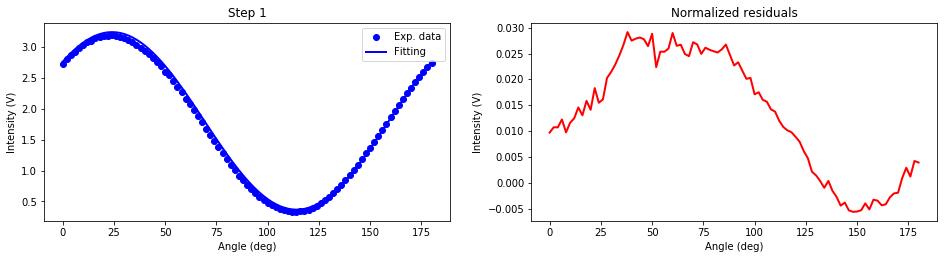

The normalized MSE is: 0.18 %.



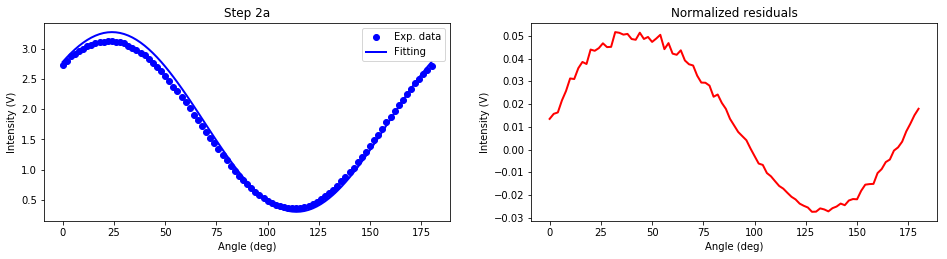

The normalized MSE is: 0.32 %.

The normalized MSE is: 0.16 %


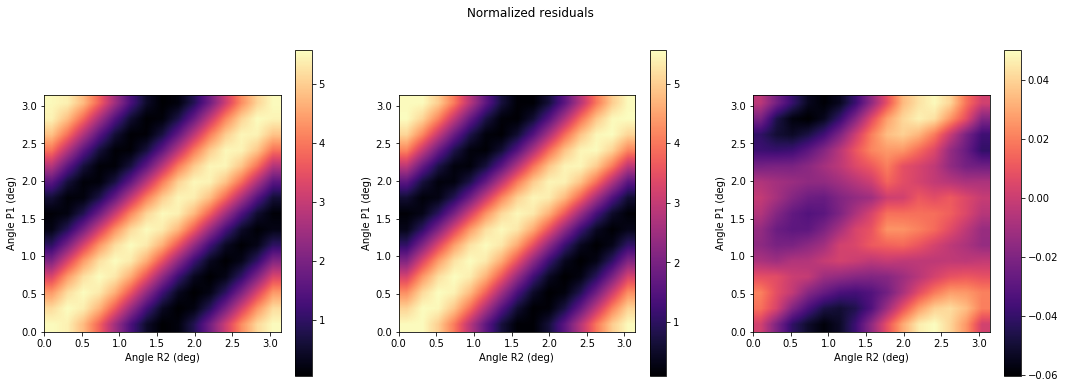

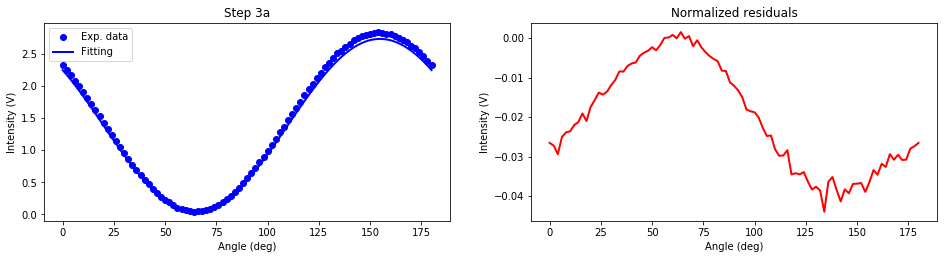

The normalized MSE is: 0.26 %.



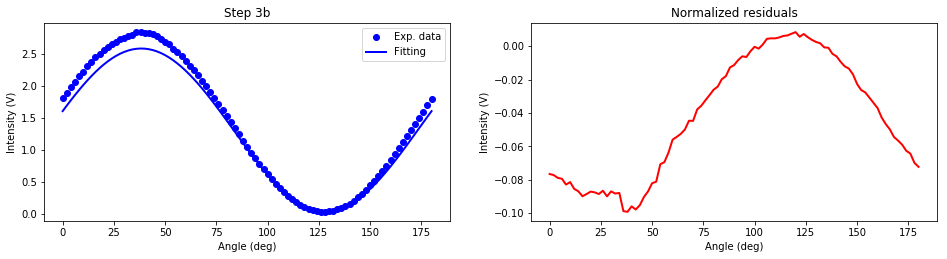

The normalized MSE is: 0.59 %.



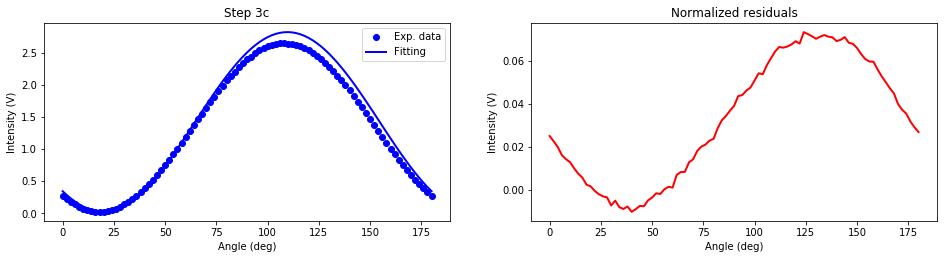

The normalized MSE is: 0.45 %.



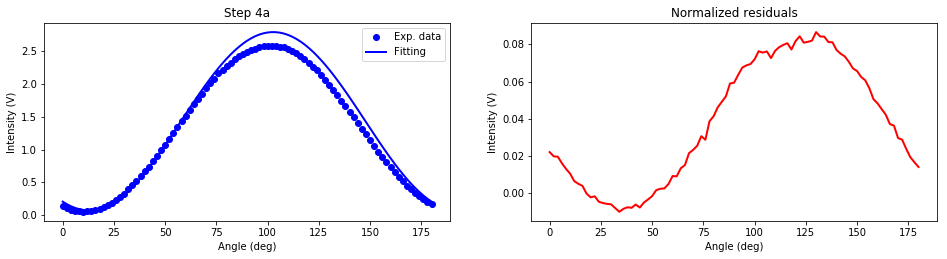

The normalized MSE is: 0.52 %.

The normalized MSE is: 0.12 %


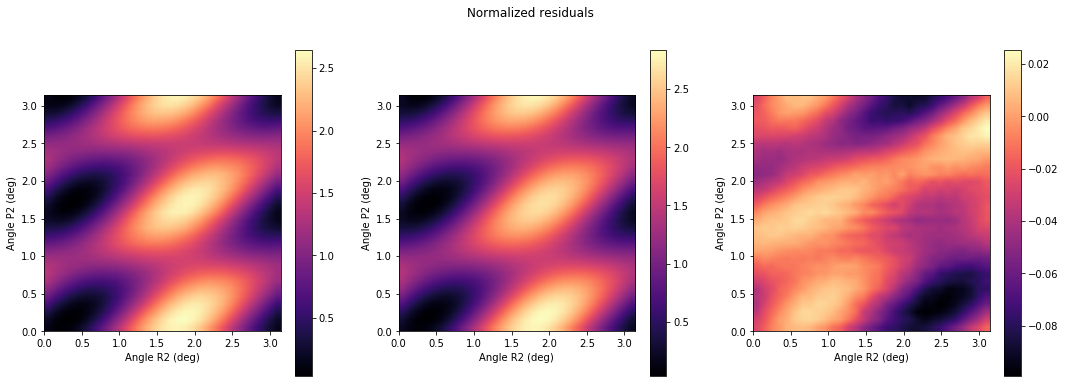

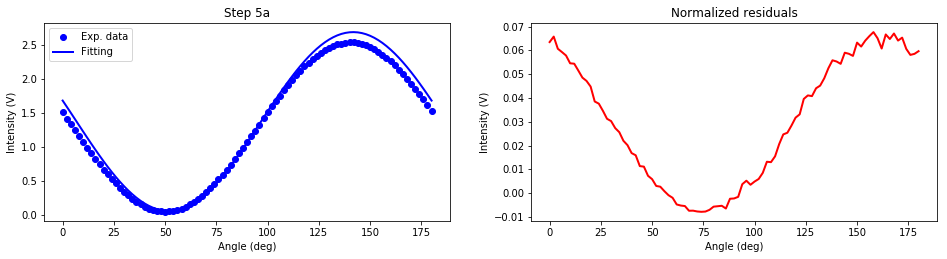

The normalized MSE is: 0.42 %.

The normalized MSE is: 0.27 %
Step 6a result:
  - Normalization factor      = 0.9887
  - Error                     = 0.420 %
   - Normalized Mueller matrix:
Filtered = 
  [+1.0000, +0.0000, -0.0000, -0.0000]
  [-0.0000, +0.9973, -0.0014, +0.0000]
  [-0.0000, -0.0009, +0.9979, +0.0019]
  [+0.0000, +0.0020, -0.0046, +0.9976]

Corrections:
  - Illumination:
     o Azimuth              = 15.25 deg.
     o Ellipticity angle    = 0.63 deg.
     o Polarization degree  = -0.0084.
  - Polarizer 1:
     o p1                   = 0.0028.
     o p2                   = 0.0027.
     o Retardance           = 0.74 deg.
     o Angle                = 0.41 deg.
  - Retarder 1:
     o p1                   = 0.0112.
     o p2                   = -0.0112.
     o Retardance           = 0.85 deg.
     o Angle                = 0.95 deg.
  - Retarder 2:
     o p1                   = 0.0145.
     o p2                   = -0.0146.
     o Retardance           = -0.16 deg.
     o Angl

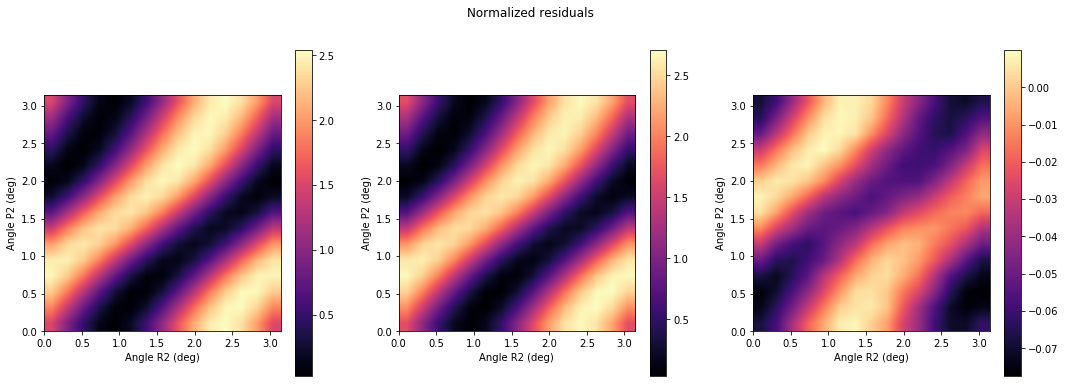

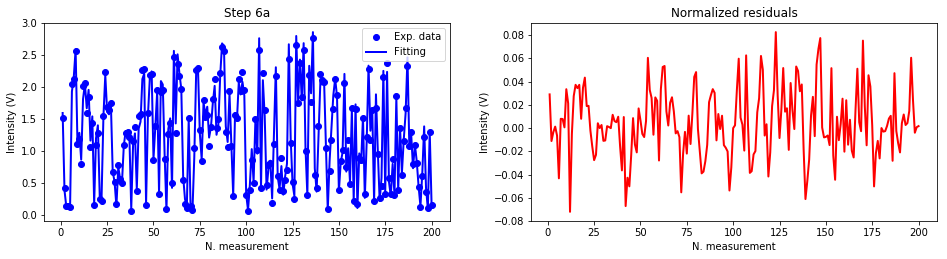

The normalized MSE is: 0.21 %.

Fit parameters:
  - Illumination:
     o Intensity            = 5.923 V (fixed).
     o Azimuth              = 101.6 deg.
     o Ellipticity angle    = -40.7 deg.
     o Polarization degree  = 0.982.
  - Polarizer 1:
     o p1                   = 0.988.
     o p2                   = 0.098.
     o Retardance           = 80.0 deg.
     o Angle (non-deff)     = 65.5 deg.
     o Angle                = 117.3 deg.
  - Retarder 1:
     o p1                   = 1.005.
     o p2                   = 0.971.
     o Retardance           = 83.3 deg.
     o Angle                = 148.6 deg.
  - Retarder 2:
     o p1                   = 1.017.
     o p2                   = 0.958.
     o Retardance           = 82.7 deg.
     o Angle (non-deff)     = 114.2 deg.
     o Angle                = 105.1 deg.
  - Polarizer 2:
     o p1                   = 0.109.
     o p2                   = 0.949.
     o Angle                = 91.1 deg.
  - Polarizer 3:
     o p1                

In [14]:
dict_param = {}
dict_param["NmaxIt"] = 50
dict_param['step_6a'] = 'all'
dict_param["jacobian"] = '2-point'  # '3-point'
dict_param["fit_function_method"] = 'trf'  # 'dogbox', 'lm'
dict_param["seed"] = np.zeros(8)
dict_param["save_data_name"] = 'Polarimeter_calibration_All.npz'

polarimeter = cal.Postprocess_Calibration(folder, file, type_data, type_process, dict_param=dict_param)

## Test load saved data

In [4]:
import numpy as np
import os

folder =  r'D:\codigo\polaripython\calibration\Calibration_2019-07-15'
os.chdir(folder)
filename = 'Polarimeter error 1E-3.npz'
data = np.load(filename, encoding='latin1')
print(data['polarimeter'])

{'p11': 0.9823254117908177, 'p12': 0.09291213715584115, 'Dp1': 1.3701691087783905, 'p21': 0.966572310522192, 'p22': 0.08808135384505018, 'p31': 0.979711396666782, 'p32': 0.08220221748349718, 'th0p1': 2.7147053563211037, 'th0p2': 1.6236686463098395, 'R1p1': 0.9939799791619766, 'R1p2': 0.9726061473203038, 'R2p1': 0.9882216915909081, 'R2p2': 0.9874375427106074, 'Dr1': 1.4121802058956856, 'Dr2': 1.4489549874725938, 'th0r1': 1.0078045858321714, 'th0r2': 0.2503290052114733, 'S0': 5.9227, 'Saz': 3.0522763483520636, 'Sel': -0.731761704828763, 'Spol': 0.9986265487161083, 'Ifuente': J = [+5.923; +0.623; -0.113; -5.881]
, 'Mp1': M = 
  [+0.4868, +0.2771, +0.3897, +0.0000]
  [+0.2771, +0.1755, +0.2213, -0.0729]
  [+0.3897, +0.2213, +0.3294, +0.0518]
  [+0.0000, +0.0729, -0.0518, +0.0182]
, 'Mp2': M @93.03 deg = 
  [+0.4710, -0.4607, -0.0489, +0.0000]
  [-0.4607, +0.4667, +0.0405, +0.0000]
  [-0.0489, +0.0405, +0.0894, +0.0000]
  [+0.0000, +0.0000, +0.0000, +0.0851]
, 'Mr1': M @57.74 deg = 
  [+0.9

In [9]:
any(np.ones(8))

True